In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### 训练数据

In [2]:
# 生成200个随机点，并改变其形状为200*1
x_data = np.linspace(-0.5, 0.5, 200)[:,np.newaxis]
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data) + noise

#查看一下数据形状
print(x_data.shape)
type(x_data)
print(noise.shape)

(200, 1)
(200, 1)


### 构建一个神经网络，用来计算给定x的值，预测y的值

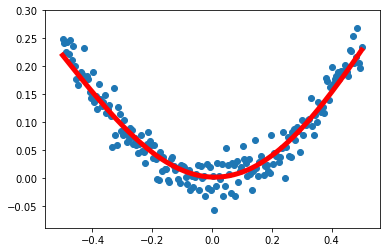

In [4]:
# 定义两个placeholder
x = tf.placeholder(tf.float32, [None,1])
y = tf.placeholder(tf.float32, [None,1])

# 定义中间层
Weights_L1 = tf.Variable(tf.random_normal([1,10]))
bias_L1 = tf.Variable(tf.zeros([1,10]))
Wx_plus_b_L1 = tf.matmul(x, Weights_L1) + bias_L1
# 激活函数
L1 = tf.nn.tanh(Wx_plus_b_L1)

# 定义输出层
Weights_L2 = tf.Variable(tf.random_normal([10,1]))
bias_L2 = tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2 = tf.matmul(L1,Weights_L2) + bias_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)

# 二次代价函数（损失函数）
loss = tf.reduce_mean(tf.square(y-prediction))
# 梯度下降法
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    # 变量的初始化
    sess.run(tf.global_variables_initializer())
    for _ in range(2000):
        sess.run(train_step, feed_dict={x:x_data, y:y_data})
        
    # 获得预测值
    prediction_value = sess.run(prediction,feed_dict={x:x_data})
    
    plt.figure()
    plt.scatter(x_data, y_data)
    plt.plot(x_data, prediction_value,'r-', lw=5)
    plt.show()